# Random Forest

Regina Ceballos Mondragón

147663

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as pth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.ensemble import RandomForestClassifier as rforest
from sklearn.ensemble import AdaBoostClassifier as adab
import seaborn
%matplotlib inline

## Data download

In [15]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[1:9]], df[[0]], train_size=0.75)
scalerx = StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)
X_train, X_test, Y_train, Y_test = np.asarray(X_train), np.asarray(X_test), np.asarray(Y_train), np.asarray(Y_test)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Tree training

In [16]:
ctree = dtree()
ctree = ctree.fit(X_train, Y_train)

In [17]:
predtree = ctree.predict(X_test)
ctree = cm(predtree, Y_test)

## Random Forest

In [18]:
cfor = rforest()
cfor.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
predfor = cfor.predict(X_test)
cfor = cm(predfor, Y_test)

## Adaboost

In [20]:
cadab = adab()
cadab.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [21]:
predadab = cadab.predict(X_test)
cadab = cm(predadab, Y_test)

## Results

### Decision Tree

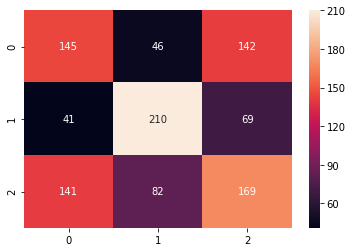

In [25]:
seaborn.heatmap(ctree, annot=True, fmt="d")

### Random Forest

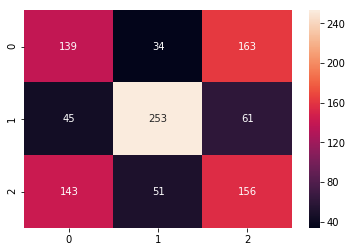

In [26]:
seaborn.heatmap(cfor, annot=True, fmt="d")

### Adaboost

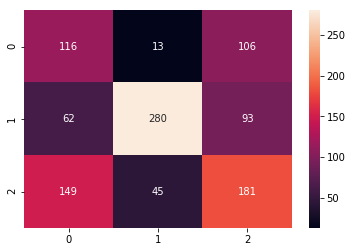

In [27]:
seaborn.heatmap(cadab, annot=True, fmt="d")

We can see that both Adaboost and Random Forest improve the predictions compared to a single tree.